## Objective:    **Perform Exploratory Data Analysis on the Haberman Dataset**

### Haberman's Survival Data Set
dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman=pd.read_csv("haberman.csv",names=['Age','yr_oper','axillaryNodes','survivalStatus'])

In [121]:
haberman

,Age,yr_oper,axillaryNodes,survivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


There are 3 columns i.e 3 features 
1. 1st feature is Age of patient at time of operation (numerical) 
2. 2nd feature is Patient's year of operation (year - 1900, numerical)
3. 3rd feature is Number of positive axillary nodes detected (numerical)
4. 4th feature is Survival status (class attribute) 1 = the patient survived 5 years or longer 
    2 = the patient died within 5 years

In [122]:
#overview of how the numerical features values are distrirbuted
haberman.describe()

,Age,yr_oper,axillaryNodes,survivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [123]:
#checking for the any null values
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             306 non-null    int64
 1   yr_oper         306 non-null    int64
 2   axillaryNodes   306 non-null    int64
 3   survivalStatus  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [124]:
print(pd.unique(haberman['survivalStatus']))
print(haberman['survivalStatus'].value_counts())

[1 2]
1    225
2     81
Name: survivalStatus, dtype: int64


<p>This dataset is imbalanced dataset because there are 224 survived patients and 81 not survived patients </p>

## Univariate Analysis

***Simple 1-D Plot***

In [125]:
#These are the records of the patients who survived more than 5 years
sur=haberman.loc[haberman['survivalStatus']==1]

#These are the records of the patients who died in less than 5 years
n_sur=haberman.loc[haberman['survivalStatus']==2]

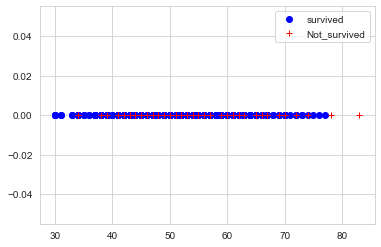

In [126]:
plt.plot(sur["Age"], np.zeros_like(sur['Age']), 'bo') 
plt.plot(n_sur["Age"], np.zeros_like(n_sur['Age']), 'r+')
plt.legend(("survived","Not_survived"))
plt.show()

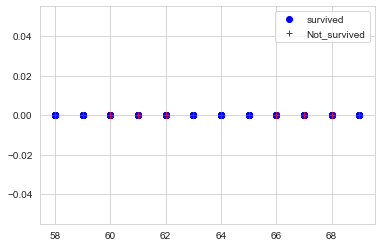

In [127]:
plt.plot(sur["yr_oper"], np.zeros_like(sur['yr_oper']), 'bo') 
plt.plot(n_sur["yr_oper"], np.zeros_like(n_sur['yr_oper']), 'r+')
plt.legend(("survived","Not_survived"))
plt.show()

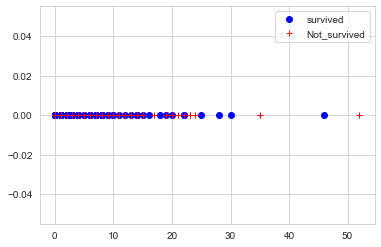

In [128]:
plt.plot(sur["axillaryNodes"], np.zeros_like(sur['axillaryNodes']), 'bo') 
plt.plot(n_sur["axillaryNodes"], np.zeros_like(n_sur['axillaryNodes']), 'r+')
plt.legend(("survived","Not_survived"))
plt.show()

1. Many of the blue("survived") and plus("not survived") are overlapped for all the three features
3. Many datapoints are overlapped we cannot clearly observe how many points are exactly located at a point.
4. To see exactly how many points of a feature are located at a certain value we have to use other plots like PDF and CDF.

**PDF**

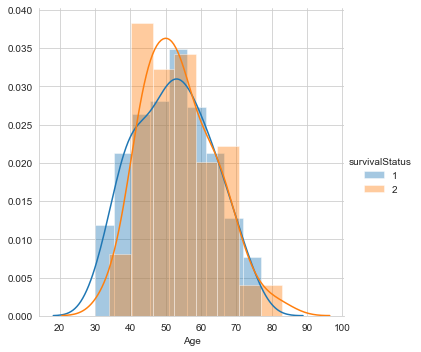

In [129]:
sns.FacetGrid(haberman, hue="survivalStatus", height=5).map(sns.distplot, "Age").add_legend();
plt.show();

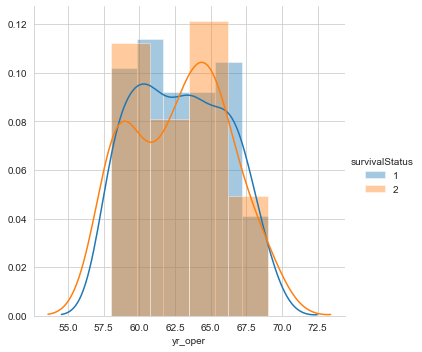

In [130]:
sns.FacetGrid(haberman, hue="survivalStatus", height=5).map(sns.distplot, "yr_oper").add_legend();
plt.show();

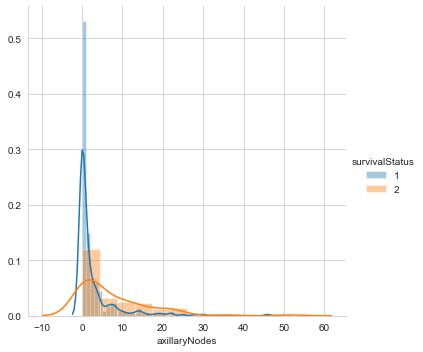

In [131]:
%matplotlib inline
sns.FacetGrid(haberman, hue="survivalStatus", height=5).map(sns.distplot, "axillaryNodes").add_legend();
plt.show();

From the above three distribution plots we can say that 
1. The first feature 'age' cannot much classify the classes of survived patients and non survived patients we can see that much of the patient who survived and not survived are both almost in same range(30-75 age) and both plots looks similar to normal distributed<br>
2. The second feature 'year of opeation' cannot much classify the survived patients and non survived patients we can see that most of the patients who survived and not survived are both almost in same range(1958 to 1966)
3. The third feature 'axillaryNodes' i.e 'Number of positive axillary nodes' for survived class the most patients are in the range in the range of 0-4  and where as for non survived class most of the patients are more spread until 35 Nodes but most of points of both groups are overlapped.

**CDF**

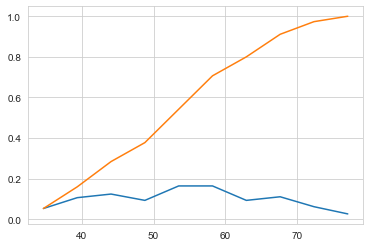

In [134]:
counts,bin_edges=np.histogram(sur['Age'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

more than 80%  of the survived patients have age less than 64

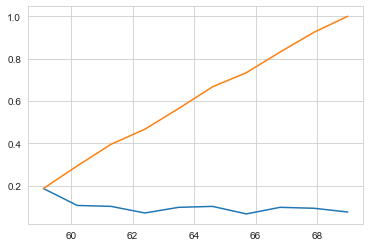

In [135]:
counts,bin_edges=np.histogram(sur['yr_oper'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

80% of the survived patients have taken the operation before 1967

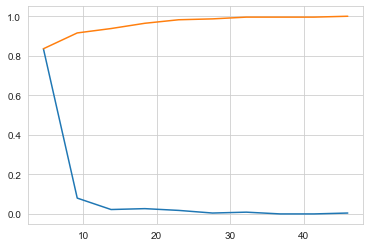

In [136]:
%matplotlib inline
counts,bin_edges=np.histogram(sur['axillaryNodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

85% of the survived patients have Axillary nodes of less than 5 and very few survived patients have nodes greater than 20.

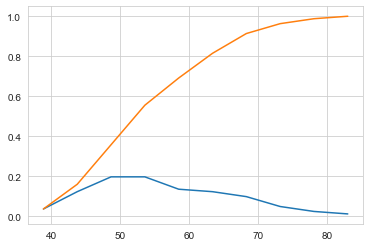

In [137]:
counts,bin_edges=np.histogram(n_sur['Age'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

more than 80% of the non survived patients have age less than 63

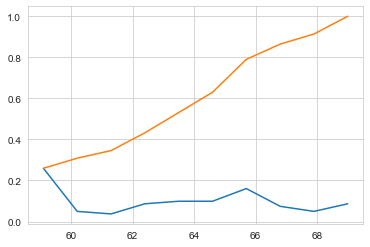

In [138]:
counts,bin_edges=np.histogram(n_sur['yr_oper'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

80% of the non survived patients have taken the operation before 1966

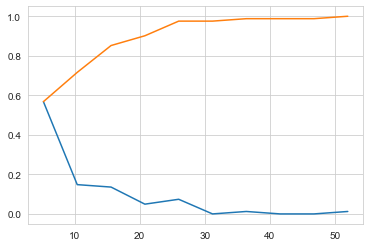

In [141]:
%matplotlib inline
counts,bin_edges=np.histogram(n_sur['axillaryNodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

## Box Plots and Whiskers

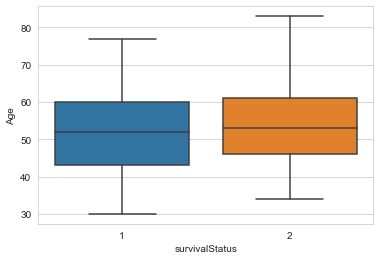

In [145]:
sns.boxplot(x="survivalStatus",y="Age",data=haberman)

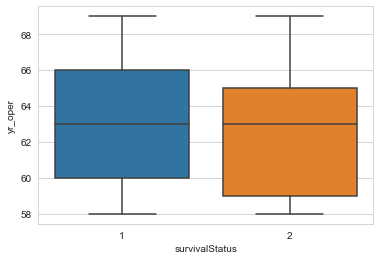

In [146]:
sns.boxplot(x='survivalStatus',y="yr_oper",data=haberman)

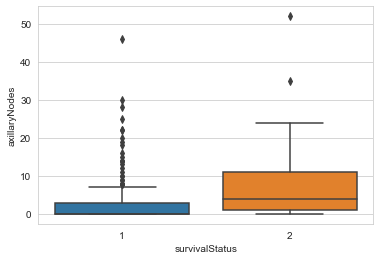

In [147]:
sns.boxplot(x="survivalStatus",y="axillaryNodes",data=haberman)

1. From the box plots of "age", "year of operation" and "axillaryNodes" we can say majority of the points of class 1 and 2 are in the same region. so it is difficult classsifying with one single feature
2. Feature "Age" and "year of operation" have majority of points for both classes have lied in the same range


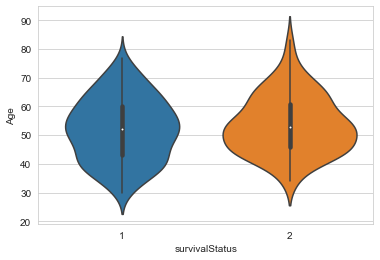

In [148]:
sns.violinplot(x="survivalStatus",y="Age",data=haberman,size=3)

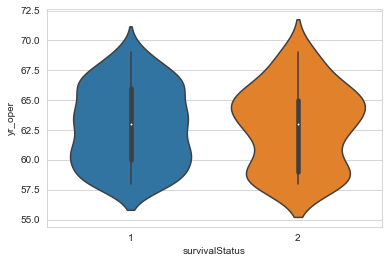

In [149]:
sns.violinplot(x="survivalStatus",y="yr_oper",data=haberman,size=3)

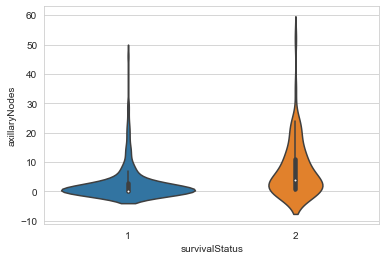

In [150]:
sns.violinplot(x="survivalStatus",y="axillaryNodes",data=haberman,size=3)

violin plots are combination of boxplots and pdf of the features

## Mean, Variance and Std-dev

In [151]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(sur["Age"]))
print(np.mean(n_sur["Age"]))
print(np.mean(sur["yr_oper"]))
print(np.mean(n_sur["yr_oper"]))
print(np.mean(sur["axillaryNodes"]))
print(np.mean(n_sur["axillaryNodes"]))

print("\nStandard Deviation:")
print(np.std(sur["Age"]))
print(np.std(n_sur["Age"]))      
print(np.std(sur["yr_oper"]))
print(np.std(n_sur["yr_oper"]))
print(np.std(sur["axillaryNodes"]))
print(np.std(n_sur["axillaryNodes"]))

Means:
52.01777777777778
53.67901234567901
62.86222222222222
62.82716049382716
2.7911111111111113
7.45679012345679

Standard Deviation:
10.987655475100508
10.104182193031312
3.2157452144021947
3.3214236255207887
5.857258449412138
9.128776076761635


## Median, Quantiles, Percentiles, IQR.

In [152]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(sur["Age"]))
#Median with an outlier
#print(np.median(np.append(sur["Age"],50)));
print(np.median(n_sur["Age"]))
print(np.median(sur["yr_oper"]))
print(np.median(n_sur["yr_oper"]))
print(np.median(sur["axillaryNodes"]))
print(np.median(n_sur["axillaryNodes"]))



print("\nQuantiles:")
print(np.percentile(sur["Age"],np.arange(0, 100, 25)))
print(np.percentile(n_sur["Age"],np.arange(0, 100, 25)))
print(np.percentile(sur["yr_oper"],np.arange(0, 100, 25)))
print(np.percentile(n_sur["yr_oper"],np.arange(0, 100, 25)))
print(np.percentile(sur["axillaryNodes"],np.arange(0, 100, 25)))
print(np.percentile(n_sur["axillaryNodes"],np.arange(0, 100, 25)))

print("\nIQR")
print(np.percentile(sur["Age"],75)-np.percentile(sur["Age"],25))
print(np.percentile(n_sur["Age"],75)-np.percentile(n_sur["Age"],25))
print(np.percentile(sur["yr_oper"],75)-np.percentile(sur["yr_oper"],25))
print(np.percentile(n_sur["yr_oper"],75)-np.percentile(n_sur["yr_oper"],25))
print(np.percentile(sur["axillaryNodes"],75)-np.percentile(sur["axillaryNodes"],25))
print(np.percentile(n_sur["axillaryNodes"],75)-np.percentile(sur["axillaryNodes"],25))


print("\n90th Percentiles:")
print(np.percentile(sur["Age"],90))
print(np.percentile(n_sur["Age"],90))
print(np.percentile(sur["yr_oper"],90))
print(np.percentile(n_sur["yr_oper"],90))
print(np.percentile(sur["axillaryNodes"],90))
print(np.percentile(n_sur["axillaryNodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(sur["Age"]))
print(robust.mad(sur["Age"],90))
print(robust.mad(n_sur["Age"],90))
print(robust.mad(sur["yr_oper"],90))
print(robust.mad(n_sur["yr_oper"],90))
print(robust.mad(sur["axillaryNodes"],90))
print(robust.mad(n_sur["axillaryNodes"],90))


Medians:
52.0
53.0
63.0
63.0
0.0
4.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

IQR
17.0
15.0
6.0
6.0
3.0
11.0

90th Percentiles:
67.0
67.0
67.0
67.0
8.0
20.0

Median Absolute Deviation
13.343419966550417
0.1
0.08888888888888889
0.03333333333333333
0.03333333333333333
0.0
0.044444444444444446


### 2-D ScatterPlots

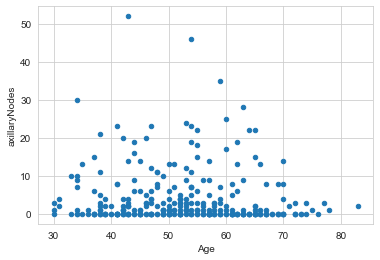

In [153]:
haberman.plot(kind='scatter',x='Age',y='axillaryNodes')

<p> Simple 2-D gives us nothing we cant identify which belong to which label so we cannot say much from the above plot </p>

**Scatterplot combined with seaborn**

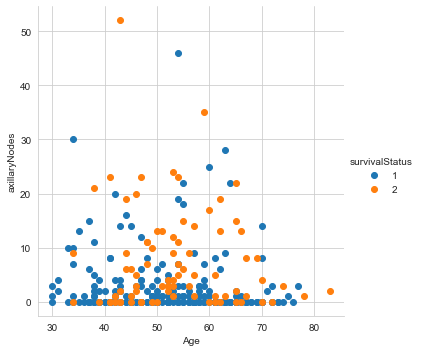

In [154]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survivalStatus',height=5).map(plt.scatter,'Age','axillaryNodes').add_legend();
plt.show()
plt.close()

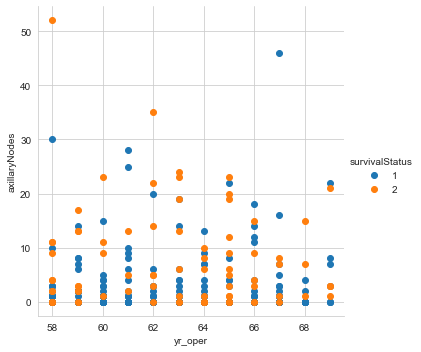

In [155]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survivalStatus',height=5).map(plt.scatter,'yr_oper','axillaryNodes').add_legend();
plt.show()
plt.close()

1. Above two scatter plot shows two labels with different colors, class 1 is shown in blue color and class 2 is shown in orange color.
2. clearly from "age vs Axillary Nodes" plot and "year of operation vs axillary Nodes" plot we cant classify the points properly with straight line(not linearly separable), most of the values are overlapped.

### Pair Plots

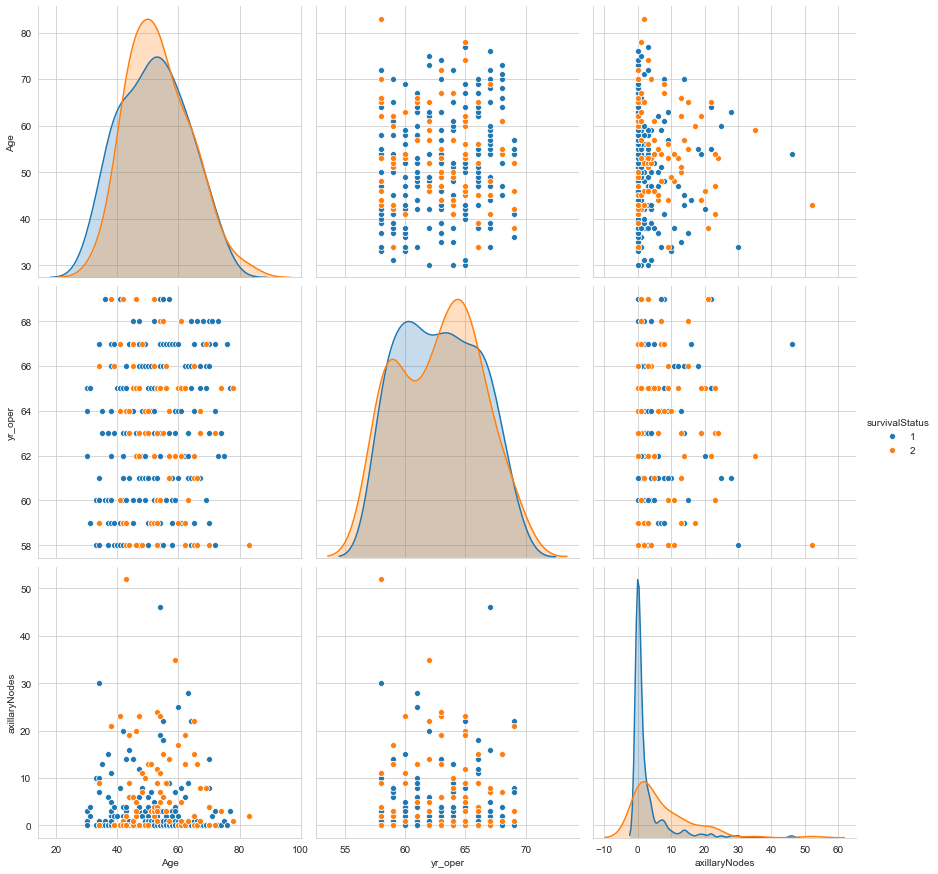

In [156]:
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='survivalStatus',height=4)
plt.show()

1. using pairplot method we can draw all the possible pairs of the features
2. we can understand from above pairplots that no two features can classify the class '1' and class '2'. In all the cases most of the points are overlapped.

### 3-D ScatterPlots

In [157]:
import plotly.express as px
fig = px.scatter_3d(haberman, x='Age', y='yr_oper', z='axillaryNodes',color='survivalStatus')
fig.show()

Plotly helps us plotting the dataset points completely as their are only four features, from this 3D scatterplot we can say all the points are mixed and very much difficult to classify them using lines or simple geometric curves

### Conclusion

1. with given features it is difficult to linearly seperate the given two classes but among given features "axillary nodes" feature is slightly better for classifying the classes. 83% survived patients have axillaryNodes less than 5 while 43% of the having axillary Nodes greater than 5 didn't survive. but even with this feature there is a high chance for misclassification<br>
2. Features "year of operation" have similar boxplots for both classes so it isn't much helpful in classfying the classes<br>
3. Given Dataset is a smaller dataset and there are many observations related to class 1(73.5%) comparing to class 2(26.4)


In [159]:
!jupyter nbconvert --to html "Haberman Survival EDA.ipynb"  

[NbConvertApp] Converting notebook Haberman Survival EDA.ipynb to html
[NbConvertApp] Writing 825637 bytes to Haberman Survival EDA.html
